# EDA on Crime Dataset (Spring 2023)
--------------------------------
**Assignement given by Dr. Dave Wanik - Department of Operations and Information Management - University of Connecticut**

* **Tharun Palla**
* **tmp21011**

In [2]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Intro

Analyzing violent crime in the United States usig crime rate dataset.

![crime map from Wiki](https://upload.wikimedia.org/wikipedia/commons/5/51/Violent_Crime_Rate_by_U.S._state.svg)

In [3]:
# read the data
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate')[0]
df.head()

State or Territory            2020                     \
     State or Territory Incidence Count Violent Crime Rate   
0                   NaN             NaN                NaN   
1  District of Columbia          7127.0              999.8   
2                Alaska          6126.0              837.8   
3            New Mexico         16393.0              778.3   
4             Tennessee         46328.0              672.7   

  Historical Violent Crime Rates                                         \
                            2019   2018    2017    2016    2015    2014   
0                            NaN    NaN     NaN     NaN     NaN     NaN   
1                         1045.2  997.1  1002.7  1203.5  1269.1  1242.6   
2                          865.0  891.7   856.7   804.6   730.2   635.5   
3                          824.0  842.8   778.6   699.4   656.1   597.7   
4                          598.9  630.4   655.0   638.5   612.1   610.7   

                           
     2013    2012    2011  
0     NaN     NaN     NaN  
1  1281.9  1241.8  1202.1  
2   602.6   604.1   606.5  
3   596.7   559.6   567.5  
4   579.7   638.5   608.2

Collapsing the multi-index
The index is really a double index with two layers - which is quite annoying.

In [4]:
# view dataframe columns
df.columns

MultiIndex([(            'State or Territory', 'State or Territory'),
            (                          '2020',    'Incidence Count'),
            (                          '2020', 'Violent Crime Rate'),
            ('Historical Violent Crime Rates',               '2019'),
            ('Historical Violent Crime Rates',               '2018'),
            ('Historical Violent Crime Rates',               '2017'),
            ('Historical Violent Crime Rates',               '2016'),
            ('Historical Violent Crime Rates',               '2015'),
            ('Historical Violent Crime Rates',               '2014'),
            ('Historical Violent Crime Rates',               '2013'),
            ('Historical Violent Crime Rates',               '2012'),
            ('Historical Violent Crime Rates',               '2011')],
           )

# Removing multi indexing in Columns


In [5]:
df.columns = ["_".join(a) for a in df.columns.to_flat_index()]
df.rename(columns = {'State or Territory_State or Territory' : 'State or Territory'}, inplace = True)
df.head()

,State or Territory,2020_Incidence Count,2020_Violent Crime Rate,Historical Violent Crime Rates_2019,Historical Violent Crime Rates_2018,Historical Violent Crime Rates_2017,Historical Violent Crime Rates_2016,Historical Violent Crime Rates_2015,Historical Violent Crime Rates_2014,Historical Violent Crime Rates_2013,Historical Violent Crime Rates_2012,Historical Violent Crime Rates_2011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2


# Checking the shape of dataframe

In [6]:
df.shape

(54, 12)

# Counting the number of missing values per column, then printing a list of unique values for the State/territory column.

In [7]:
df = df.dropna(subset=['State or Territory'])
df.isna().sum()

State or Territory                     0
2020_Incidence Count                   0
2020_Violent Crime Rate                0
Historical Violent Crime Rates_2019    0
Historical Violent Crime Rates_2018    0
Historical Violent Crime Rates_2017    0
Historical Violent Crime Rates_2016    0
Historical Violent Crime Rates_2015    0
Historical Violent Crime Rates_2014    0
Historical Violent Crime Rates_2013    0
Historical Violent Crime Rates_2012    0
Historical Violent Crime Rates_2011    0
dtype: int64

# Removing Teritories

In [10]:
df = df[np.isin(df['State or Territory'], ['District of Columbia' , 'United States', 'Puerto Rico'], invert = True)]
df = df.rename(columns = {"State or Territory" : "State"})

(50, 12)

In [11]:
df.head()

,State,2020_Incidence Count,2020_Violent Crime Rate,Historical Violent Crime Rates_2019,Historical Violent Crime Rates_2018,Historical Violent Crime Rates_2017,Historical Violent Crime Rates_2016,Historical Violent Crime Rates_2015,Historical Violent Crime Rates_2014,Historical Violent Crime Rates_2013,Historical Violent Crime Rates_2012,Historical Violent Crime Rates_2011
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2
5,Arkansas,20363.0,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9
6,Arizona,35980.0,654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6,405.9


States having the highest and lowest crime rate in 2020

In [61]:
highest = df.where(df['2020_Violent Crime Rate'] == np.max(df['2020_Violent Crime Rate'])).dropna()
lowest =  df.where(df['2020_Violent Crime Rate'] == np.min(df['2020_Violent Crime Rate'])).dropna()
print("State with highest crime rate in 2020 is {0}".format(highest['State'].values[0]))
print("State with lowest crime rate in 2020 is {0}".format(lowest['State'].values[0]))


State with highest crime rate in 2020 is Alaska
State with lowest crime rate in 2020 is Maine


# line plots to evaluate the trend of violent crime in all states.


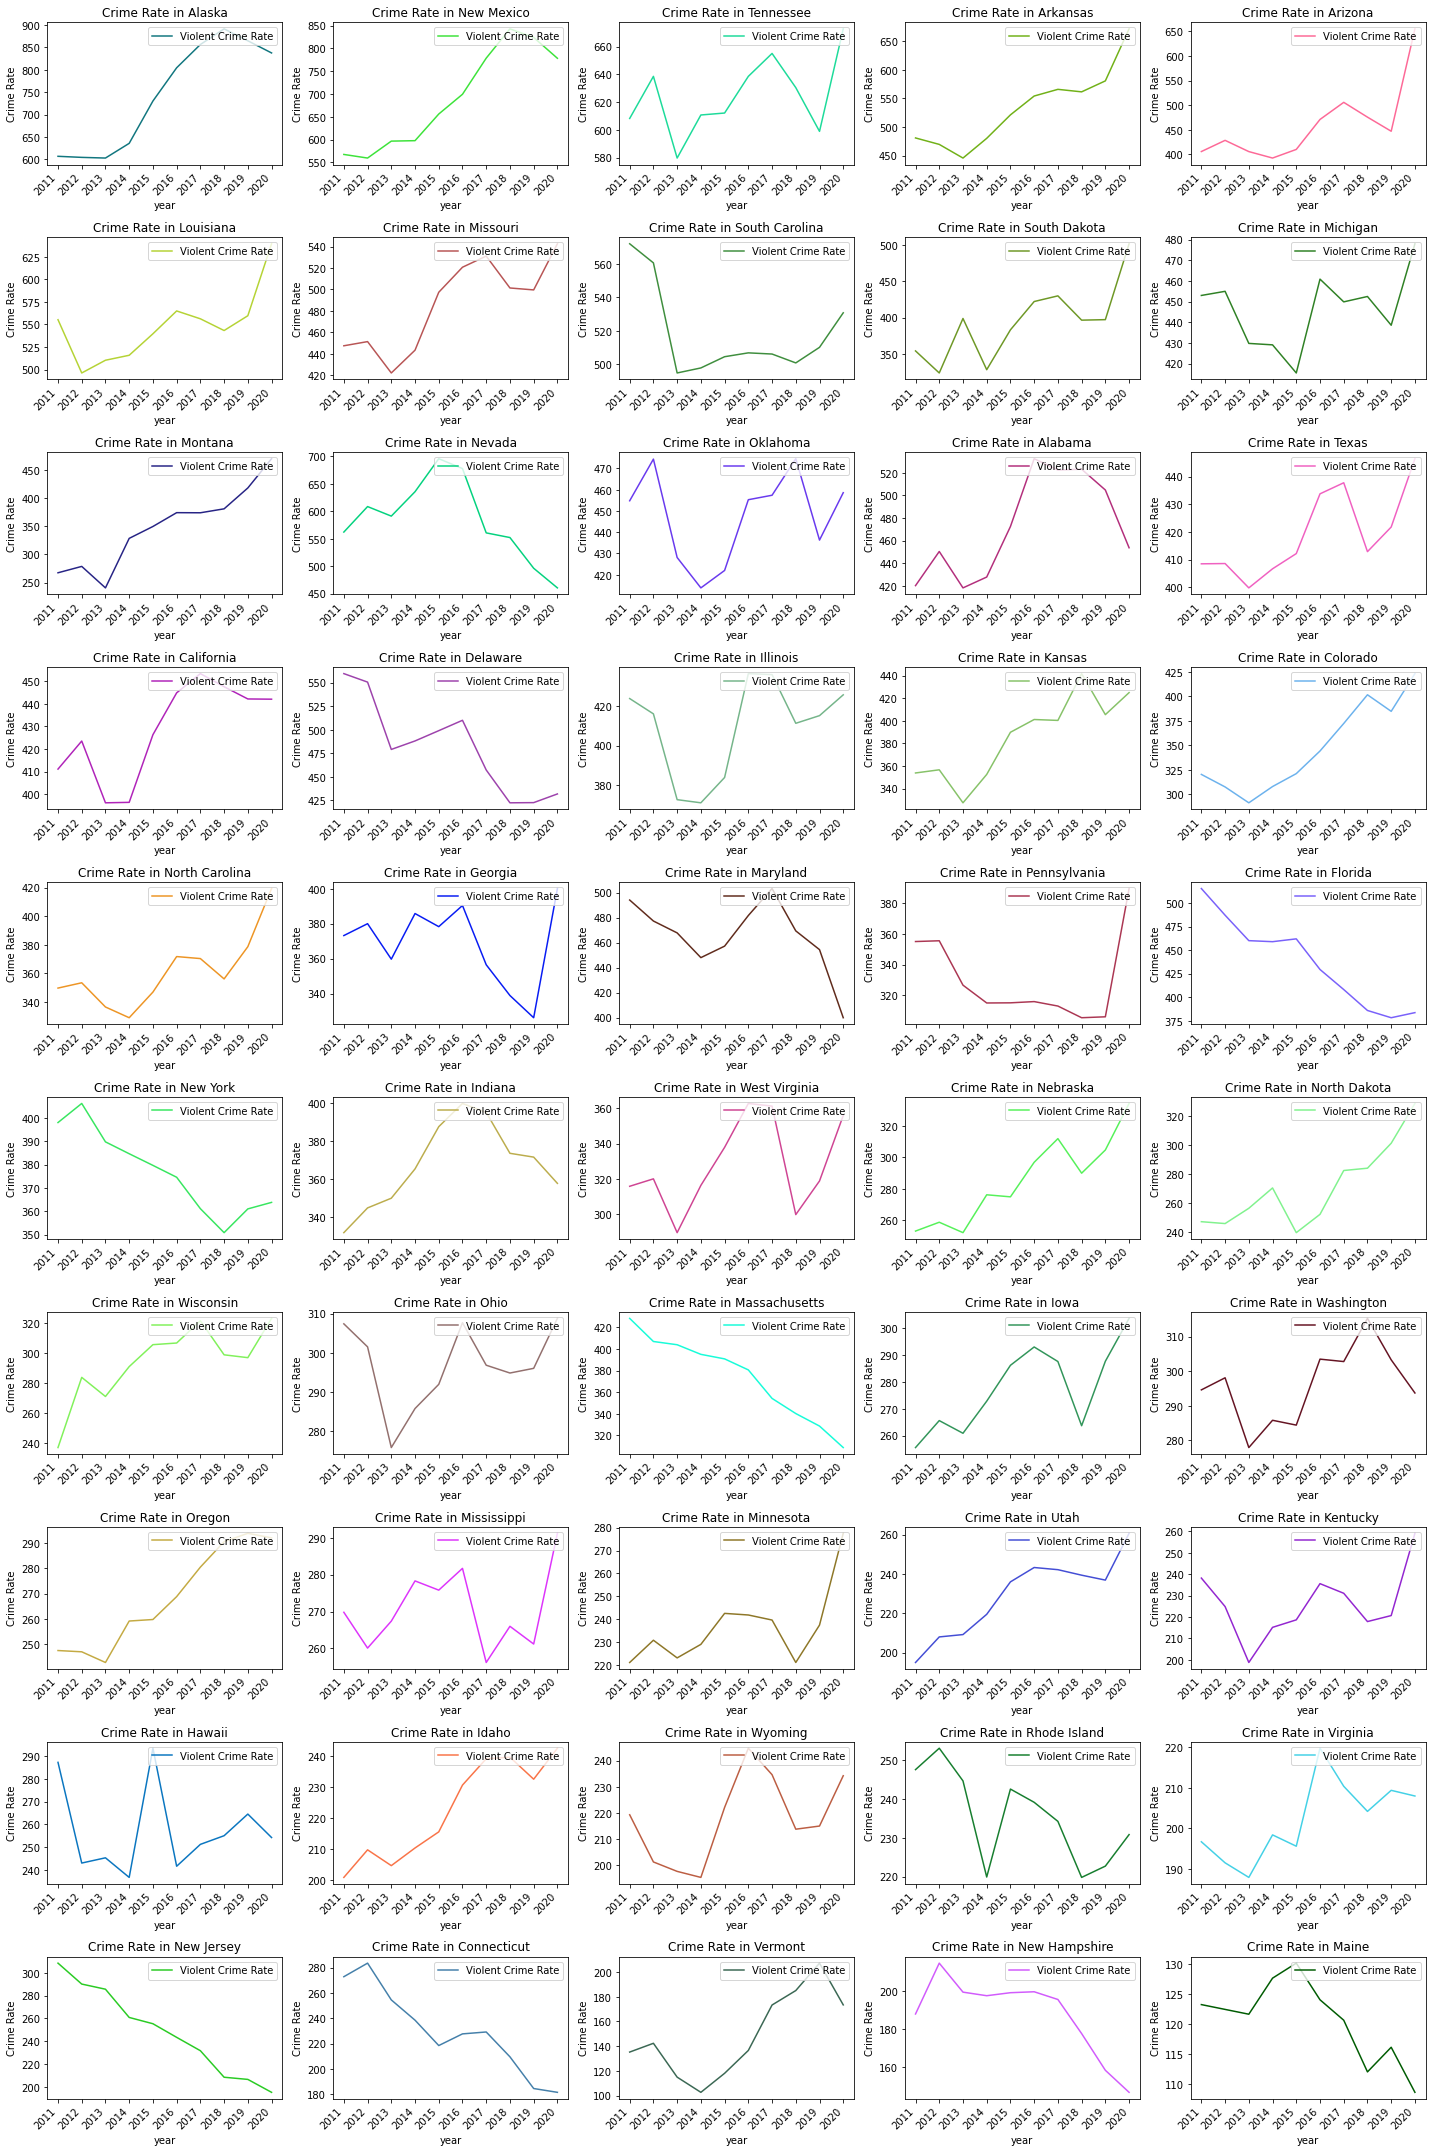

In [64]:
plt.figure(figsize= (20,30))
for i,state in enumerate(df['State']):
  state_df = df.where(df['State'] == state).dropna()
  state_df = state_df.transpose()[2:]
  state_df = state_df.reset_index()
  state_df.columns = ['Year', "CrimeRate"]
  state_df['Year'] = state_df['Year'].str.extract("(\d+)")
  state_df = state_df[::-1]
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.subplot(10,5,i+1)
  plt.plot(state_df.Year,state_df.CrimeRate , label ='Violent Crime Rate' ,color = col)
  plt.legend(loc='upper right')
  plt.xlabel("year")
  plt.xticks(rotation=45, ha='right')
  plt.ylabel("Crime Rate")
  plt.title("Crime Rate in {0}".format(state))
plt.tight_layout()
plt.show()




States whose crime rates reduced in 2020 vs. 2019

In [66]:
states = np.array(df.where(df['2020_Violent Crime Rate'] < df['Historical Violent Crime Rates_2019']).dropna()['State'].unique())
print(states)

['Alaska' 'New Mexico' 'Nevada' 'Alabama' 'California' 'Maryland'
 'Indiana' 'Massachusetts' 'Washington' 'Oregon' 'Hawaii' 'Virginia'
 'New Jersey' 'Connecticut' 'Vermont' 'New Hampshire' 'Maine']


# Q7. Compute the raw change between 2020 and 2019 for all States and print summary statistics.

In [70]:
change = pd.DataFrame(df[['State', "2020_Violent Crime Rate", "Historical Violent Crime Rates_2019"]])
change['Difference'] = change['2020_Violent Crime Rate'] - change['Historical Violent Crime Rates_2019']
change.describe()

,2020_Violent Crime Rate,Historical Violent Crime Rates_2019,Difference
count,50.000000,50.000000,50.000000
mean,387.422000,366.968000,20.454000
std,158.952549,150.412832,44.755359
min,108.600000,116.100000,-54.500000
25%,280.925000,262.025000,-6.375000
50%,373.700000,344.850000,17.550000
75%,457.350000,438.025000,38.475000
max,837.800000,865.000000,207.700000


# Analysis from Summary Statistics :
The table shows the statistics for the violent crime rate in 2020 and 2019 for 50 cities. The average violent crime rate in 2020 was 387.42, which is 20.45 higher than the average in 2019 (366.97). The standard deviation of the 2020 violent crime rate was 158.95, and the standard deviation of the 2019 violent crime rate was 150.41. The minimum violent crime rate in 2020 was 108.6, and the maximum was 837.8. The median violent crime rate in 2020 was 373.7, which was 17.55 higher than the median in 2019 (344.85). The range of the violent crime rate in 2020 was 729.2 (837.8-108.6). The maximum change of all states in violent crime from 2019 to 2020 is 207.7

# Histogram of change in Crime Rate

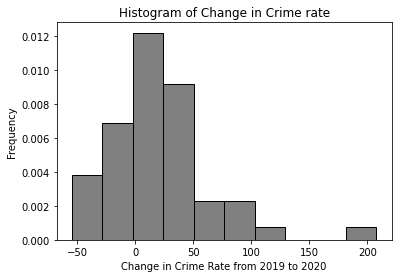

In [71]:
plt.hist(change['Difference'], color ="gray", edgecolor = "black", density = True)
plt.xlabel("Change in Crime Rate from 2019 to 2020")
plt.ylabel("Frequency")
plt.title("Histogram of Change in Crime rate")
plt.show()

# Percentage change between 2020 and 2019 for all States and analysing summary statistics

In [72]:
change['Percentage Change'] = (change['Difference']/change['Historical Violent Crime Rates_2019']) *100
change.describe()

,2020_Violent Crime Rate,Historical Violent Crime Rates_2019,Difference,Percentage Change
count,50.000000,50.000000,50.000000,50.000000
mean,387.422000,366.968000,20.454000,5.415681
std,158.952549,150.412832,44.755359,11.120359
min,108.600000,116.100000,-54.500000,-16.312741
25%,280.925000,262.025000,-6.375000,-2.764665
50%,373.700000,344.850000,17.550000,4.566601
75%,457.350000,438.025000,38.475000,10.552274
max,837.800000,865.000000,207.700000,46.454932


# Box Plot of Percentage change in crime rate

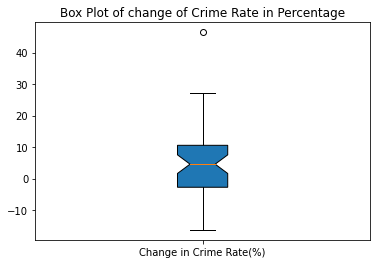

In [73]:
plt.boxplot(change['Percentage Change'], notch=True, patch_artist=True, labels =['Change in Crime Rate(%)'])
plt.title("Box Plot of change of Crime Rate in Percentage")
plt.show()

# Histogram of Percentage change in crime rate

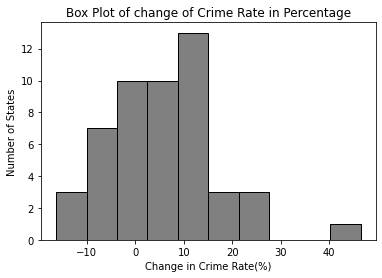

In [74]:
plt.hist(change['Percentage Change'] , edgecolor="black", color = "gray")
plt.title("Box Plot of change of Crime Rate in Percentage")
plt.xlabel("Change in Crime Rate(%)")
plt.ylabel("Number of States")

plt.show()